In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.18.1.


In [3]:
# Importamos los datos obtenidos por estrella del otro NB
# Concatenamos datos de baja y alta perturbacion
x1=np.loadtxt("input_per_star_highhp.csv",delimiter=",")
x2=np.loadtxt("input_per_star_lowhp.csv",delimiter=",")
x1=np.concatenate((x1,x2),axis=0)

target1=np.loadtxt("target_planets_highhp.csv",delimiter=",")
target12=np.loadtxt("target_planets_lowhp.csv",delimiter=",")
target1=np.concatenate((target1,target12),axis=0)

target2=np.loadtxt("target_mtotal_highhp.csv",delimiter=",")
target21=np.loadtxt("target_mtotal_lowhp.csv",delimiter=",")
target2=np.concatenate((target2,target21),axis=0)

target3=np.loadtxt("target_effi_highhp.csv",delimiter=",")
target31=np.loadtxt("target_effi_lowhp.csv",delimiter=",")
target3=np.concatenate((target3,target31),axis=0)

# TARGET 1 (NÚMERO DE PLANETAS)
# Support Vector Regression (Target 1)

In [4]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing

t1_norm=preprocessing.scale(target1)
x_norm=preprocessing.scale(x1)

CC=np.linspace(50,100,20)
r2_rc=[]

X1_train, X1_test, Y1_train, Y1_test = train_test_split(x_norm, t1_norm,train_size=0.8)

for ci in CC:
    svr_rbf=SVR(kernel='rbf', C=ci)
    y_rbf=svr_rbf.fit(X1_train, Y1_train).predict(X1_test)
    r2_rbf=r2_score(Y1_test,y_rbf)
    
    r2_rc.append(r2_rbf)

//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


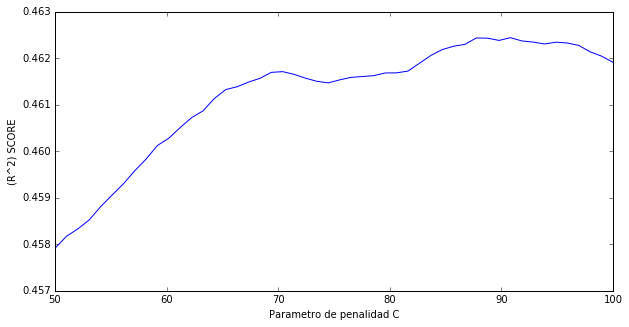

In [5]:
plt.figure(figsize=(10,5))
plt.plot(CC,r2_rc)
plt.xlabel("Parametro de penalidad C")
plt.ylabel("(R^2) SCORE")
plt.show()

In [6]:
print("El parametro optimo de penalidad C para la regresion es: "+str(CC[np.argmax(r2_rc)]))

El parametro optimo de penalidad C para la regresion es: 90.8163265306


In [7]:
cc=CC[np.argmax(r2_rc)]
gam=np.linspace(0.01,0.5,20)

r2_rg=[]

for gi in gam:
    svr_rbf=SVR(kernel='rbf', C=cc,gamma=gi)
    y_rbf=svr_rbf.fit(X1_train, Y1_train).predict(X1_test)
    r2_rbf=r2_score(Y1_test,y_rbf)
    
    r2_rg.append(r2_rbf)

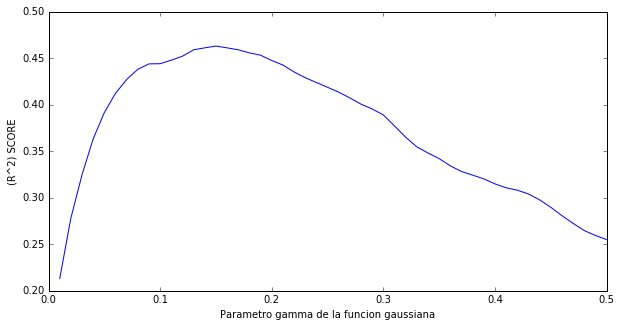

In [8]:
plt.figure(figsize=(10,5))
plt.plot(gam,r2_rg)
plt.xlabel("Parametro gamma de la funcion gaussiana")
plt.ylabel("(R^2) SCORE")
plt.show()

In [9]:
print("El parametro optimo gamma para la regresion gaussiana es: "+str(gam[np.argmax(r2_rg)]))

El parametro optimo gamma para la regresion gaussiana es: 0.15


In [10]:
cc=CC[np.argmax(r2_rc)]
gg=gam[np.argmax(r2_rg)]

eps=np.linspace(0.001,0.4,20)

r2_re=[]

for eei in eps:
    svr_rbf=SVR(kernel='rbf', C=cc,gamma=gg,epsilon=eei)
    y_rbf=svr_rbf.fit(X1_train, Y1_train).predict(X1_test)
    r2_rbf=r2_score(Y1_test,y_rbf)
    
    r2_re.append(r2_rbf)

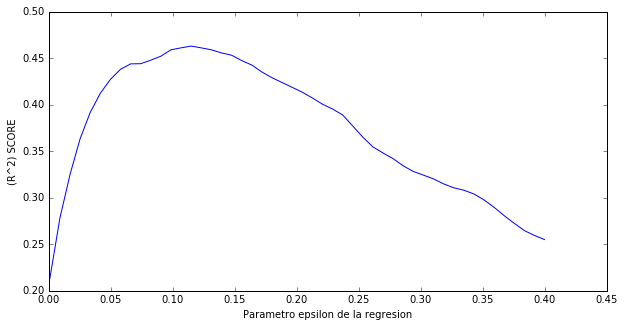

In [11]:
plt.figure(figsize=(10,5))
plt.plot(eps,r2_rg)
plt.xlabel("Parametro epsilon de la regresion")
plt.ylabel("(R^2) SCORE")
plt.show()

In [12]:
print("El parametro optimo epsilon para la regresion es: "+str(eps[np.argmax(r2_re)]))

El parametro optimo epsilon para la regresion es: 0.343


In [76]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing

cc=CC[np.argmax(r2_rc)]
gg=gam[np.argmax(r2_rg)]
ee=eps[np.argmax(r2_re)]

svr_rbf=SVR(kernel='rbf', C=cc, gamma=gg,epsilon=ee)
y_rbf=svr_rbf.fit(X1_train, Y1_train).predict(X1_test)
r2_rbf=r2_score(Y1_test,y_rbf)

print("PARAMETROS OPTIMOS DE LA SUPPORT VECTOR REGRESSION DEL TARGET 1 (NUMERO DE PLANETAS):")
print("C: "+str(cc))
print("Gamma: "+str(gg))
print("Epsilon: "+str(ee))
print(" ")
print("PARA UN SCORE DE:")
print("R^2: "+str(r2_rbf))

PARAMETROS OPTIMOS DE LA SUPPORT VECTOR REGRESSION DEL TARGET 1 (NUMERO DE PLANETAS):
C: 90.8163265306
Gamma: 0.15
Epsilon: 0.343
 
PARA UN SCORE DE:
R^2: 0.487277370634


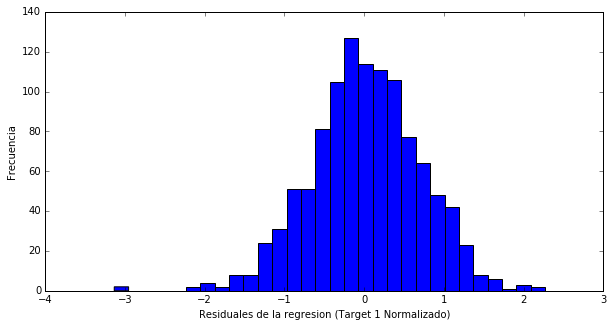

In [77]:
plt.figure(figsize=(10,5))
plt.hist(Y1_test-y_rbf,bins=30)
plt.xlabel("Residuales de la regresion (Target 1 Normalizado)")
plt.ylabel("Frecuencia")
plt.show()

# Random Forest (Target 1)
## Parametros mas influyentes

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

xrf1=pd.DataFrame(x1,columns=['emestar','rc','sigmag_0','emed','apert','emetal','taugas'])

X12_train, X12_test, Y12_train, Y12_test = train_test_split(xrf1, target1.astype(int),train_size=0.8)

rf1=RandomForestClassifier(n_estimators=30)
rf1.fit(X12_train,Y12_train)
rf1_prediction=rf1.predict(X12_test)

r2_rf1=r2_score(Y12_test,rf1_prediction)

print("EL SCORE (R^2) DEL RANDOM FOREST ES: "+ str(r2_rf1))

EL SCORE (R^2) DEL RANDOM FOREST ES: 0.362866617228


In [243]:
ii1 = np.argsort(rf1.feature_importances_)

print("IMPORTANCIA RELATIVA DE CADA PARAMETRO DE ENTRADA SEGUN RF PARA TARGET 1: (De menor a mayor)")
for i in ii1:
    print(xrf1.axes[1][i],rf1.feature_importances_[i] )

IMPORTANCIA RELATIVA DE CADA PARAMETRO DE ENTRADA SEGUN RF PARA TARGET 1: (De menor a mayor)
emed 0.120468577182
rc 0.133103603288
emestar 0.137685495524
sigmag_0 0.143557705748
taugas 0.145795249292
emetal 0.146531887885
apert 0.172857481081


# Red Neuronal (Target 1)

In [203]:
from sklearn.neural_network import MLPRegressor

t1_norm=preprocessing.scale(target1)

X13_train, X13_test, Y13_train, Y13_test = train_test_split(x_norm,t1_norm,train_size=0.8,random_state=1)

hidden_layer_1=range(1,10)
r2_hl=[]

for hi in hidden_layer_1:
    nn2=MLPRegressor(hidden_layer_sizes=(hi,),max_iter=10000)
    nn2.fit(X13_train,Y13_train)
    nn2_prediction=nn2.predict(X13_test)
    r2_nn2=r2_score(Y13_test,nn2_prediction)
    
    r2_hl.append(r2_nn2)

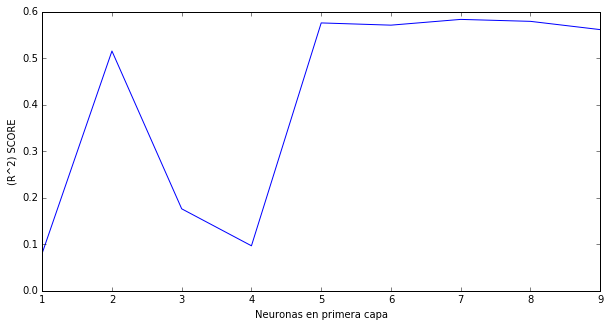

In [204]:
plt.figure(figsize=(10,5))
plt.plot(hidden_layer_1,r2_hl)
plt.xlabel("Neuronas en primera capa")
plt.ylabel("(R^2) SCORE")
plt.show()

In [205]:
print("Para la primera capa, el numero de neuronas optimo es: "+ str(hidden_layer_1[np.argmax(r2_hl)]))

Para la primera capa, el numero de neuronas optimo es: 7


In [206]:
hidden_layer_2=range(1,10)
r2_hl2=[]

for hi in hidden_layer_2:
    nn2=MLPRegressor(hidden_layer_sizes=(hidden_layer_1[np.argmax(r2_hl)],hi),max_iter=10000)
    nn2.fit(X13_train,Y13_train)
    nn2_prediction=nn2.predict(X13_test)
    r2_nn2=r2_score(Y13_test,nn2_prediction)
    
    r2_hl2.append(r2_nn2)

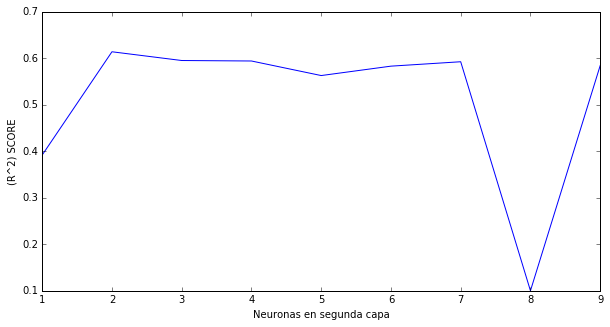

In [207]:
plt.figure(figsize=(10,5))
plt.plot(hidden_layer_2,r2_hl2)
plt.xlabel("Neuronas en segunda capa")
plt.ylabel("(R^2) SCORE")
plt.show()

In [208]:
print("Para la segunda capa, el numero de neuronas optimo es: "+ str(hidden_layer_2[np.argmax(r2_hl2)]))

Para la segunda capa, el numero de neuronas optimo es: 2


In [210]:
# Neural Network Final

h1_max=hidden_layer_1[np.argmax(r2_hl)]
h2_max=hidden_layer_2[np.argmax(r2_hl2)]

nn2=MLPRegressor(hidden_layer_sizes=(h1_max,h2_max),max_iter=10000)
nn2.fit(X13_train,Y13_train)
nn2_prediction=nn2.predict(X13_test)
r2_nn2=r2_score(Y13_test,nn2_prediction)

print("Para el TARGET 1, utilizamos una red neuronal de dos capas con:")
print("Nivel 1: "+str(h1_max)+" neuronas")
print("Nivel 2: "+str(h2_max)+" neuronas")
print(" ")
print("PARA UN SCORE DE:")
print("R^2: "+str(r2_nn2))

Para el TARGET 1, utilizamos una red neuronal de dos capas con:
Nivel 1: 7 neuronas
Nivel 2: 2 neuronas
 
PARA UN SCORE DE:
R^2: 0.583709005167


# TARGET 2 (MASA TOTAL DE PLANETAS)
# Support Vector Regression (Target 2)

In [218]:
t2_norm=preprocessing.scale(target2)

CC2=np.linspace(40,100,10)
r2_rc2=[]

X2_train, X2_test, Y2_train, Y2_test = train_test_split(x_norm, t2_norm,train_size=0.8)

for ci in CC2:
    svr_rbf=SVR(kernel='rbf', C=ci)
    y_rbf=svr_rbf.fit(X2_train, Y2_train).predict(X2_test)
    r2_rbf=r2_score(Y2_test,y_rbf)
    
    r2_rc2.append(r2_rbf)

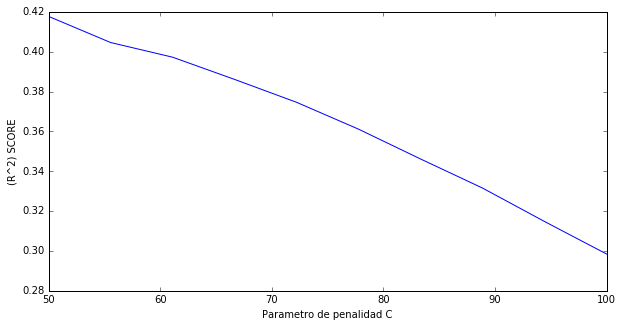

In [219]:
plt.figure(figsize=(10,5))
plt.plot(CC2,r2_rc2)
plt.xlabel("Parametro de penalidad C")
plt.ylabel("(R^2) SCORE")
plt.show()

In [220]:
cc2=CC2[np.argmax(r2_rc2)]
gam2=np.linspace(0.01,0.5,10)

r2_rg2=[]

for gi in gam2:
    svr_rbf=SVR(kernel='rbf', C=cc2,gamma=gi)
    y_rbf=svr_rbf.fit(X2_train, Y2_train).predict(X2_test)
    r2_rbf=r2_score(Y2_test,y_rbf)
    
    r2_rg2.append(r2_rbf)

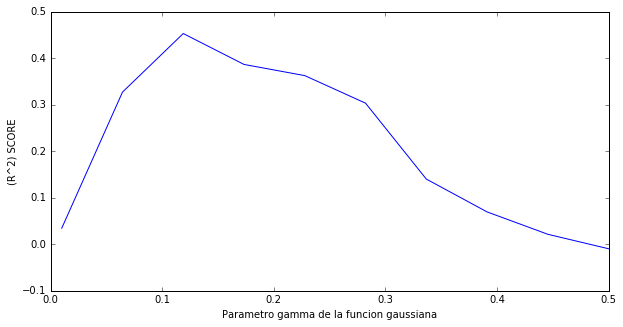

In [221]:
plt.figure(figsize=(10,5))
plt.plot(gam2,r2_rg2)
plt.xlabel("Parametro gamma de la funcion gaussiana")
plt.ylabel("(R^2) SCORE")
plt.show()

In [224]:
cc2=CC2[np.argmax(r2_rc2)]
gg2=gam2[np.argmax(r2_rg2)]

eps2=np.linspace(0.001,0.4,15)

r2_re2=[]

for eei in eps2:
    svr_rbf=SVR(kernel='rbf', C=cc2,gamma=gg2,epsilon=eei)
    y_rbf=svr_rbf.fit(X2_train, Y2_train).predict(X2_test)
    r2_rbf=r2_score(Y2_test,y_rbf)
    
    r2_re2.append(r2_rbf)

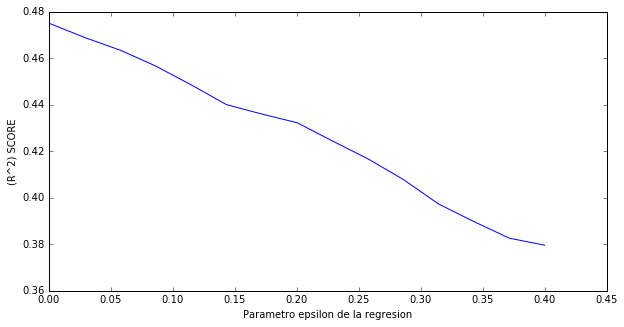

In [225]:
plt.figure(figsize=(10,5))
plt.plot(eps2,r2_re2)
plt.xlabel("Parametro epsilon de la regresion")
plt.ylabel("(R^2) SCORE")
plt.show()

In [226]:
cc2=CC2[np.argmax(r2_rc2)]
gg2=gam2[np.argmax(r2_rg2)]
ee2=eps2[np.argmax(r2_re2)]

svr_rbf=SVR(kernel='rbf', C=cc2, gamma=gg2,epsilon=ee2)
y_rbf=svr_rbf.fit(X2_train, Y2_train).predict(X2_test)
r2_rbf=r2_score(Y2_test,y_rbf)

print("PARAMETROS OPTIMOS DE LA SUPPORT VECTOR REGRESSION DEL TARGET 2:")
print("C: "+str(cc2))
print("Gamma: "+str(gg2))
print("Epsilon: "+str(ee2))
print(" ")
print("PARA UN SCORE DE:")
print("R^2: "+str(r2_rbf))

PARAMETROS OPTIMOS DE LA SUPPORT VECTOR REGRESSION DEL TARGET 2 (NUMERO DE PLANETAS):
C: 50.0
Gamma: 0.118888888889
Epsilon: 0.001
 
PARA UN SCORE DE:
R^2: 0.474963991648


# Random Forest (Target 2)
## Parametros mas influyentes

In [246]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

xrf2=pd.DataFrame(x1,columns=['emestar','rc','sigmag_0','emed','apert','emetal','taugas'])

X22_train, X22_test, Y22_train, Y22_test = train_test_split(xrf2,target2,train_size=0.8)

rf2=RandomForestRegressor(n_estimators=50)
rf2.fit(X22_train,Y22_train)
rf2_prediction=rf2.predict(X22_test)

r2_rf2=r2_score(Y22_test,rf2_prediction)

print("EL SCORE (R^2) DEL RANDOM FOREST ES: "+ str(r2_rf2))

EL SCORE (R^2) DEL RANDOM FOREST ES: 0.329069093463


In [247]:
ii2 = np.argsort(rf2.feature_importances_)

print("IMPORTANCIA RELATIVA DE CADA PARAMETRO DE ENTRADA SEGUN RF PARA TARGET 2:")
for i in ii2:
    print(xrf2.axes[1][i],rf2.feature_importances_[i] )

IMPORTANCIA RELATIVA DE CADA PARAMETRO DE ENTRADA SEGUN RF PARA TARGET 2:
taugas 0.100417336385
apert 0.122075311324
rc 0.128972150465
emetal 0.134906634659
sigmag_0 0.15809990604
emestar 0.162714018751
emed 0.192814642376


# Red Neuronal (Target 2)

In [248]:
from sklearn.neural_network import MLPRegressor

t2_norm=preprocessing.scale(target2)

X23_train, X23_test, Y23_train, Y23_test = train_test_split(x_norm,t2_norm,train_size=0.8,random_state=1)

hidden_layer_1=range(1,10)
r2_hl22=[]

for hi in hidden_layer_1:
    nn2=MLPRegressor(hidden_layer_sizes=(hi,),max_iter=10000)
    nn2.fit(X23_train,Y23_train)
    nn2_prediction=nn2.predict(X23_test)
    r2_nn2=r2_score(Y23_test,nn2_prediction)
    
    r2_hl22.append(r2_nn2)

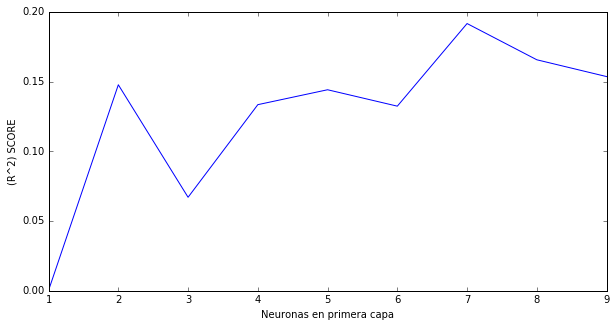

In [249]:
plt.figure(figsize=(10,5))
plt.plot(hidden_layer_1,r2_hl22)
plt.xlabel("Neuronas en primera capa")
plt.ylabel("(R^2) SCORE")
plt.show()

In [250]:
hidden_layer_2=range(1,10)
r2_hl222=[]

for hi in hidden_layer_2:
    nn2=MLPRegressor(hidden_layer_sizes=(hidden_layer_1[np.argmax(r2_hl22)],hi),max_iter=10000)
    nn2.fit(X23_train,Y23_train)
    nn2_prediction=nn2.predict(X23_test)
    r2_nn2=r2_score(Y23_test,nn2_prediction)
    
    r2_hl222.append(r2_nn2)

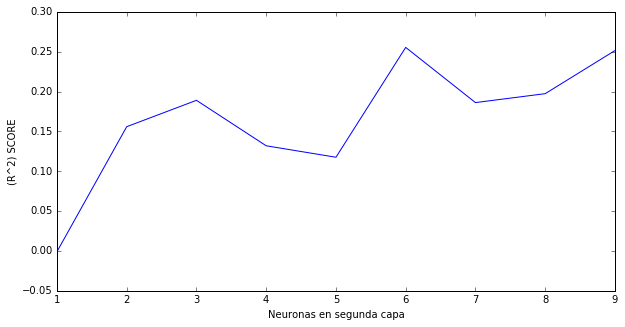

In [251]:
plt.figure(figsize=(10,5))
plt.plot(hidden_layer_2,r2_hl222)
plt.xlabel("Neuronas en segunda capa")
plt.ylabel("(R^2) SCORE")
plt.show()

In [252]:
h1_max=hidden_layer_1[np.argmax(r2_hl22)]
h2_max=hidden_layer_2[np.argmax(r2_hl222)]

nn2=MLPRegressor(hidden_layer_sizes=(h1_max,h2_max),max_iter=10000)
nn2.fit(X23_train,Y23_train)
nn2_prediction=nn2.predict(X23_test)
r2_nn2=r2_score(Y23_test,nn2_prediction)

print("Para el TARGET 2, utilizamos una red neuronal de dos capas con:")
print("Nivel 1: "+str(h1_max)+" neuronas")
print("Nivel 2: "+str(h2_max)+" neuronas")
print(" ")
print("PARA UN SCORE DE:")
print("R^2: "+str(r2_nn2))

Para el TARGET 2, utilizamos una red neuronal de dos capas con:
Nivel 1: 7 neuronas
Nivel 2: 6 neuronas
 
PARA UN SCORE DE:
R^2: 0.201147708262


# TARGET 3 (EFICIENCIA DE MASA)
# Support Vector Regression (Target 3)

In [253]:
t3_norm=preprocessing.scale(target3)

CC3=np.linspace(10,100,15)
r2_rc3=[]

X3_train, X3_test, Y3_train, Y3_test = train_test_split(x_norm,t3_norm,train_size=0.8)

for ci in CC3:
    svr_rbf=SVR(kernel='linear', C=ci)
    y_rbf=svr_rbf.fit(X3_train, Y3_train).predict(X3_test)
    r2_rbf=r2_score(Y3_test,y_rbf)
    
    r2_rc3.append(r2_rbf)

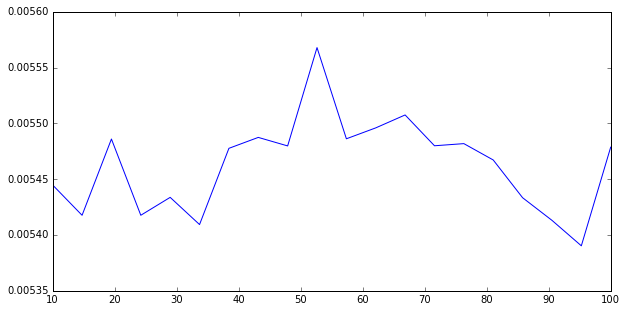

In [254]:
plt.figure(figsize=(10,5))
plt.plot(CC3,r2_rc3)
plt.show()

In [255]:
cc3=CC3[np.argmax(r2_rc3)]
gam3=np.linspace(0.01,0.5,15)

r2_rg3=[]

for gi in gam3:
    svr_rbf=SVR(kernel='rbf', C=cc3,gamma=gi)
    y_rbf=svr_rbf.fit(X3_train, Y3_train).predict(X3_test)
    r2_rbf=r2_score(Y3_test,y_rbf)
    
    r2_rg3.append(r2_rbf)

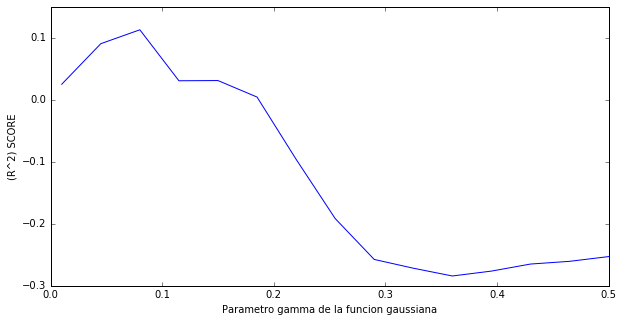

In [256]:
plt.figure(figsize=(10,5))
plt.plot(gam3,r2_rg3)
plt.xlabel("Parametro gamma de la funcion gaussiana")
plt.ylabel("(R^2) SCORE")
plt.show()

In [257]:
cc3=CC3[np.argmax(r2_rc3)]
gg3=gam3[np.argmax(r2_rg3)]

eps3=np.linspace(0.001,0.4,15)

r2_re3=[]

for eei in eps3:
    svr_rbf=SVR(kernel='rbf', C=cc3,gamma=gg3,epsilon=eei)
    y_rbf=svr_rbf.fit(X3_train, Y3_train).predict(X3_test)
    r2_rbf=r2_score(Y3_test,y_rbf)
    
    r2_re3.append(r2_rbf)

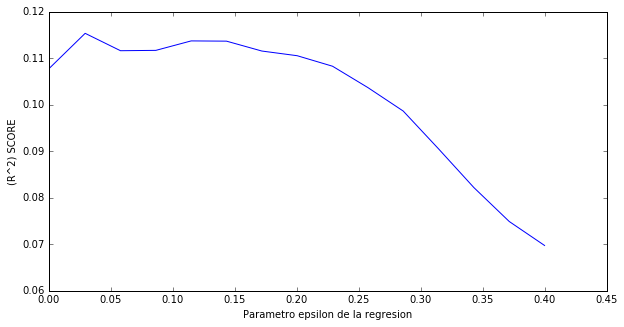

In [258]:
plt.figure(figsize=(10,5))
plt.plot(eps3,r2_re3)
plt.xlabel("Parametro epsilon de la regresion")
plt.ylabel("(R^2) SCORE")
plt.show()

In [259]:
cc3=CC3[np.argmax(r2_rc3)]
gg3=gam3[np.argmax(r2_rg3)]
ee3=eps3[np.argmax(r2_re3)]

svr_rbf=SVR(kernel='rbf', C=cc3, gamma=gg3,epsilon=ee3)
y_rbf=svr_rbf.fit(X3_train, Y3_train).predict(X3_test)
r2_rbf=r2_score(Y3_test,y_rbf)

print("PARAMETROS OPTIMOS DE LA SUPPORT VECTOR REGRESSION DEL TARGET 3:")
print("C: "+str(cc3))
print("Gamma: "+str(gg3))
print("Epsilon: "+str(ee3))
print(" ")
print("PARA UN SCORE DE:")
print("R^2: "+str(r2_rbf))

PARAMETROS OPTIMOS DE LA SUPPORT VECTOR REGRESSION DEL TARGET 3:
C: 52.6315789474
Gamma: 0.08
Epsilon: 0.0295
 
PARA UN SCORE DE:
R^2: 0.115369644666


# Random Forest (Target 3)
## Parametros mas influyentes

In [260]:
from sklearn.ensemble import RandomForestRegressor

xrf3=pd.DataFrame(x1,columns=['emestar','rc','sigmag_0','emed','apert','emetal','taugas'])

X32_train, X32_test, Y32_train, Y32_test = train_test_split(xrf3,target3,train_size=0.8)

rf3=RandomForestRegressor(n_estimators=40)
rf3.fit(X32_train,Y32_train)
rf3_prediction=rf3.predict(X32_test)

r2_rf3=r2_score(Y32_test,rf3_prediction)

print("EL SCORE (R^2) DEL RANDOM FOREST ES: "+ str(r2_rf3))

EL SCORE (R^2) DEL RANDOM FOREST ES: 0.0531090472721


In [261]:
ii3 = np.argsort(rf3.feature_importances_)

print("IMPORTANCIA RELATIVA DE CADA PARAMETRO DE ENTRADA SEGUN RF PARA TARGET 3:")
for i in ii3:
    print(xrf3.axes[1][i],rf3.feature_importances_[i] )

IMPORTANCIA RELATIVA DE CADA PARAMETRO DE ENTRADA SEGUN RF PARA TARGET 3:
apert 0.101492959966
emed 0.120320794395
taugas 0.1297570178
rc 0.134633978501
sigmag_0 0.159436400888
emestar 0.171521993042
emetal 0.182836855408


# Red Neuronal (Target 3)

In [266]:
from sklearn.neural_network import MLPRegressor

t3_norm=preprocessing.scale(target3)

X33_train, X33_test, Y33_train, Y33_test = train_test_split(x_norm,t3_norm,train_size=0.8)

hidden_layer_1=range(1,10)
r2_hl3=[]

for hi in hidden_layer_1:
    nn2=MLPRegressor(hidden_layer_sizes=(hi,),max_iter=10000)
    nn2.fit(X33_train,Y33_train)
    nn2_prediction=nn2.predict(X33_test)
    r2_nn2=r2_score(Y33_test,nn2_prediction)
    
    r2_hl3.append(r2_nn2)

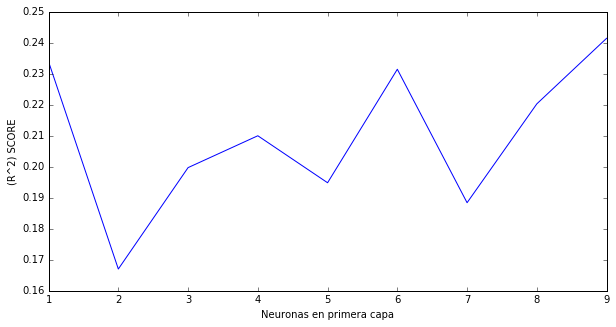

In [267]:
plt.figure(figsize=(10,5))
plt.plot(hidden_layer_1,r2_hl3)
plt.xlabel("Neuronas en primera capa")
plt.ylabel("(R^2) SCORE")
plt.show()

In [268]:
hidden_layer_2=range(1,10)
r2_hl33=[]

for hi in hidden_layer_2:
    nn2=MLPRegressor(hidden_layer_sizes=(hidden_layer_1[np.argmax(r2_hl3)],hi),max_iter=10000)
    nn2.fit(X33_train,Y33_train)
    nn2_prediction=nn2.predict(X33_test)
    r2_nn2=r2_score(Y33_test,nn2_prediction)
    
    r2_hl33.append(r2_nn2)

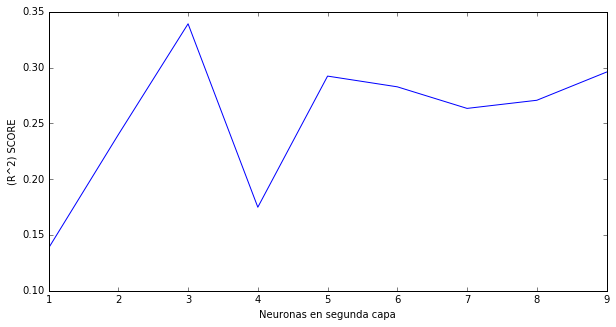

In [269]:
plt.figure(figsize=(10,5))
plt.plot(hidden_layer_2,r2_hl33)
plt.xlabel("Neuronas en segunda capa")
plt.ylabel("(R^2) SCORE")
plt.show()

In [270]:
h1_max=hidden_layer_1[np.argmax(r2_hl3)]
h2_max=hidden_layer_2[np.argmax(r2_hl33)]

nn2=MLPRegressor(hidden_layer_sizes=(h1_max,h2_max),max_iter=10000)
nn2.fit(X33_train,Y33_train)
nn2_prediction=nn2.predict(X33_test)
r2_nn2=r2_score(Y33_test,nn2_prediction)

print("Para el TARGET 3, utilizamos una red neuronal de dos capas con:")
print("Nivel 1: "+str(h1_max)+" neuronas")
print("Nivel 2: "+str(h2_max)+" neuronas")
print(" ")
print("PARA UN SCORE DE:")
print("R^2: "+str(r2_nn2))

Para el TARGET 3, utilizamos una red neuronal de dos capas con:
Nivel 1: 9 neuronas
Nivel 2: 3 neuronas
 
PARA UN SCORE DE:
R^2: 0.229817021884


# CONCLUSIONES
# 1. El mejor score (R-squared) obtenido para todos los targets no supera la marca del 0.6
# 2. El mejor ajuste hecho fue para el target 1 (Numero de planetas) con una red neuronal
# 3. La red neuronal muestra el mejor desempeño estadistico y computacional
# 4. Las diferencias entre la importancia de las entradas no es significativa
# 5. El target 2 y 3 no tienen una tendencia significativa para poder presentar modelos con poder de prediccion